In [1]:
import requests
import ipfsApi
from PIL import Image
from io import BytesIO

# NFTPORT_API_KEY= ""

### Creating a NFT

In [2]:
file = open("BEE-BRONZE.jpg", "rb")
url = "https://api.nftport.xyz/v0/mints/easy/files"

WALLET_KEY = "0x6cb42EB8d1F63Ed6ca95Ee228B30d581DB035B7C"


query_params = {
    "chain": "polygon",
    "name": "NFT_K_1",
    "description": "NFT First Test",
    "mint_to_address": WALLET_KEY
}

response = requests.post(
    url,
    headers={"Authorization": NFTPORT_API_KEY},
    params=query_params,
    files={"file": file}
)
print(response.json())

{'response': 'OK', 'chain': 'polygon', 'contract_address': '0x1a61dd84d67228b04cf28542c9f492a07cc1a38a', 'transaction_hash': '0x99d93d3362ae27258be001ed636cec8266a8b0ff1f61d0ed4969d4bcbdd2bc35', 'transaction_external_url': 'https://polygonscan.com/tx/0x99d93d3362ae27258be001ed636cec8266a8b0ff1f61d0ed4969d4bcbdd2bc35', 'mint_to_address': '0x6cb42EB8d1F63Ed6ca95Ee228B30d581DB035B7C', 'name': 'NFT_K_1', 'description': 'NFT First Test'}


### GET NFT

In [3]:
transaction_hash = response.json()['transaction_hash']
url_get = "https://api.nftport.xyz/v0/mints/{}?chain=polygon".format(transaction_hash)

response_get = requests.get(
    url_get,
    headers={"Authorization": NFTPORT_API_KEY},
)

print(response_get.json())

{'response': 'OK', 'chain': 'polygon', 'contract_address': '0x1a61dd84d67228b04cf28542c9f492a07cc1a38a', 'token_id': '3443'}


### GET IMAGE ON IPFS

https://ipfs.io/ipfs/bafkreibgmrf4vvqeupbsj25m2rtqb55wonq6pequnvib7q2km5cf555pla


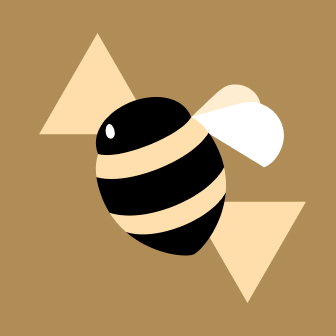

In [5]:
url_ipfs_metadata = "https://ipfs.io/ipfs/bafkreihug7zbpw643sqkipjke5a7vummg76qij5f4qyjbbdgg5nqfsdhii"


response_ipfs = requests.get(
    url_ipfs_metadata
)

print(response_ipfs.json()['image'])

url_ipfs_img = response_ipfs.json()['image']

response_ipfs_img = requests.get(
    url_ipfs_img
)

response_img = requests.get(url_ipfs_img)
Image.open(BytesIO(response_img.content))
